# Customer_Churn_Analysis_Project :-  DataTrained   |   

# Evaluation_Project_7


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

### Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Import data from github and start the preprocessing steps:

In [2]:
# import data

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking shapes

data.shape

(7043, 21)

#### Observations:

This Dataset has 7043 rows and 21 columns. Let's study the column's names and their charectaristics.

In [4]:
# checking columns names

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observations:
1. Among 21 columns, there are 1 float values,  18 are object types and 2 are int datatype.
2. There is one target variable , Churn.
3. Churn is a categorical data, needs Classification model to predict this.

In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Observations:

Here customerID has different value for every different entries. Later drop this column.

### Checking duplicate:

In [7]:
#checking duplicate

data.duplicated().sum()

0

#### Observatios:

The dataset is free from duplicates.

### Statistical features:

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


#### Observations:
1. No null values are present.
2. Customer ID is unique for every set of data.
3. Target variable is Churn and it is a binary **categorical data**. So the problem is a **Classification problem**.
4. "SeniorCitizen" is a categorical variable as it has two different value, 0 and 1. Let's convert it into object datatype.

In [10]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(object)

### Let check if any whitespace, 'NA' or '-' exist in dataset

In [11]:
data.isin([' ','NA','-']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data['TotalCharges']= data['TotalCharges'].replace(' ',np.nan)

In [13]:
data['TotalCharges'].isin([' ','NA','-']).sum()

0

In [14]:
# Converting object datatype into float

data['TotalCharges']= data['TotalCharges'].astype(float)

In [15]:
data['TotalCharges'].isna().sum()

11

#### Observations:

1. Replace ' ' with np.NaN
2. No blank space, NA, '-', '?' exist in dataset.

### Checking Null:

In [16]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))

missing value details 

                   Null Values  Null Values percentage
customerID                  0                0.000000
MonthlyCharges              0                0.000000
PaymentMethod               0                0.000000
PaperlessBilling            0                0.000000
Contract                    0                0.000000
StreamingMovies             0                0.000000
StreamingTV                 0                0.000000
TechSupport                 0                0.000000
DeviceProtection            0                0.000000
OnlineBackup                0                0.000000
InternetService             0                0.000000
MultipleLines               0                0.000000
PhoneService                0                0.000000
tenure                      0                0.000000
Dependents                  0                0.000000
Partner                     0                0.000000
SeniorCitizen               0                0.000000
gen

<AxesSubplot:>

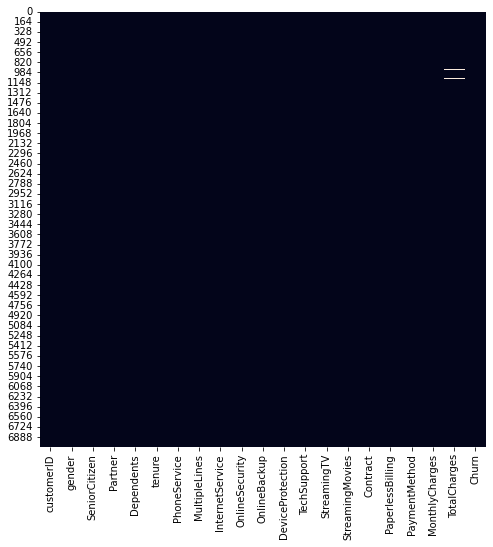

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),cbar=False)

#### Observations: 

Null values are present in the totalcharges column of the dataset.

### Null value imputation:

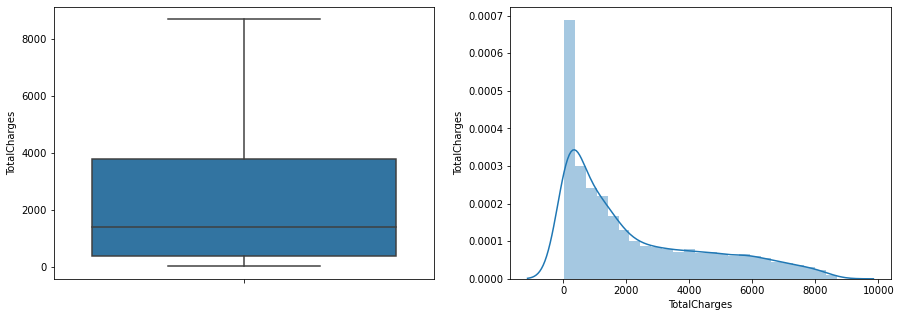

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'TotalCharges', data= data,ax=ax[0])
plt.ylabel('TotalCharges')
sns.distplot(data['TotalCharges'] ,ax=ax[1])
plt.xlabel('TotalCharges')
plt.show()

In [19]:
print("Mean of TotalCharges:",data['TotalCharges'].mean())
print("Median of TotalCharges:",data['TotalCharges'].median())

Mean of TotalCharges: 2283.3004408418697
Median of TotalCharges: 1397.475


#### Observation:

Outliers doesnot exist and 'TotalCharges' feature is right skewed. Let's impute missing value with Mean.

#### Imputation of Missing value in TotalCharges with Mean:

In [20]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

#### Drop the unnecessary column

In [21]:
data.drop(['customerID'],axis=1,inplace=True)

### Differentiate Numarical and Categorical Data:

In [ ]:
data.columns.to_series().groupby(data.dtypes).groups

In [23]:
# spliting into Numerical & Categorical 
num_features = ['tenure','MonthlyCharges', 'TotalCharges']

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

### Exploratory Data Analysis(EDA):



#### Categorical Data Analysis:

In [24]:
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of gender is---
 Male      3555
Female    3488
Name: gender, dtype: int64
Value counts of SeniorCitizen is---
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Value counts of Partner is---
 No     3641
Yes    3402
Name: Partner, dtype: int64
Value counts of Dependents is---
 No     4933
Yes    2110
Name: Dependents, dtype: int64
Value counts of PhoneService is---
 Yes    6361
No      682
Name: PhoneService, dtype: int64
Value counts of MultipleLines is---
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Value counts of InternetService is---
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Value counts of OnlineSecurity is---
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Value counts of OnlineBackup is---
 No                     3088
Yes                    2429
No internet service    1526

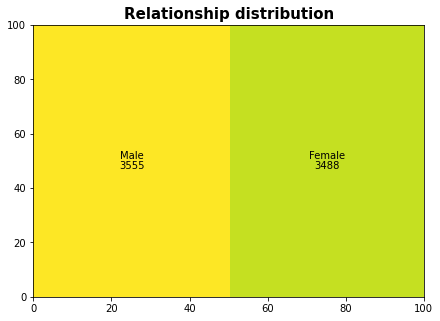

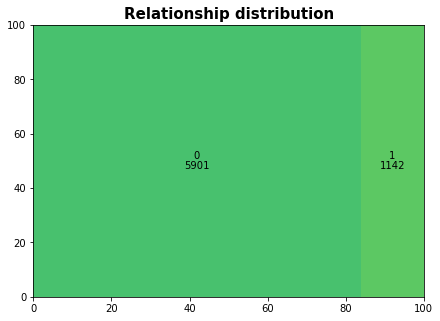

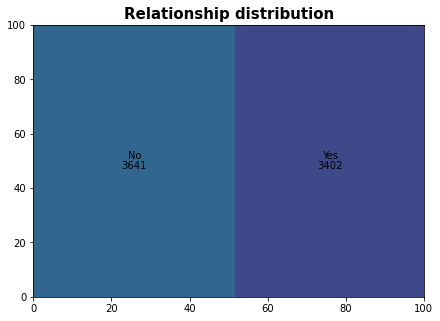

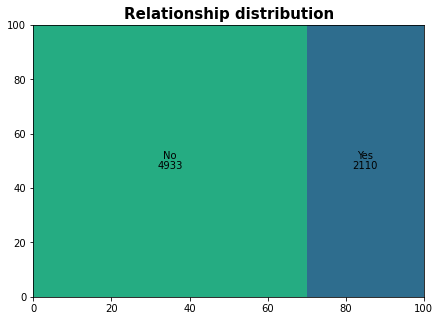

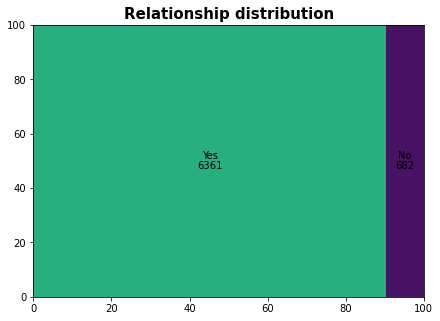

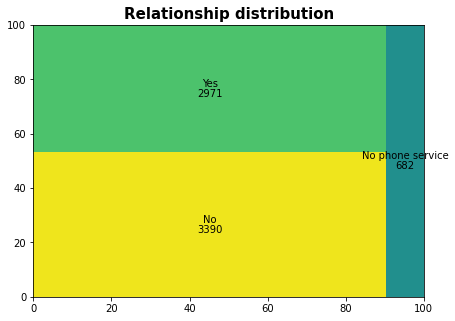

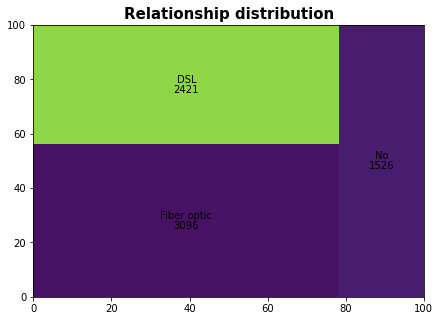

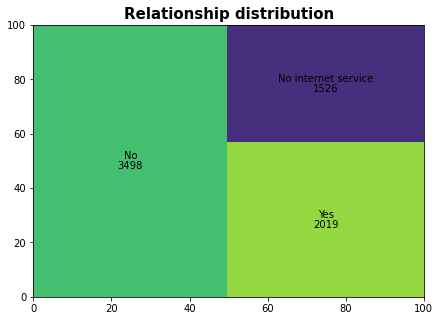

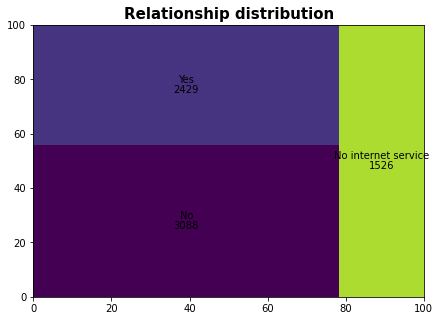

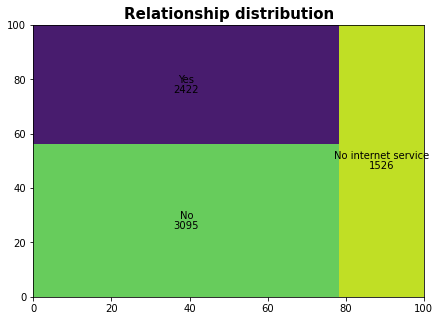

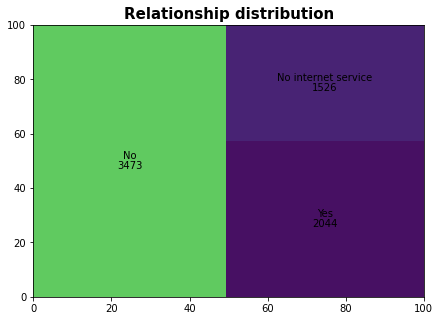

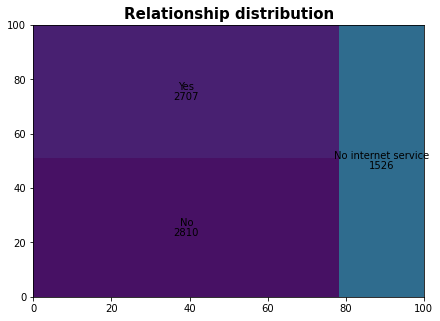

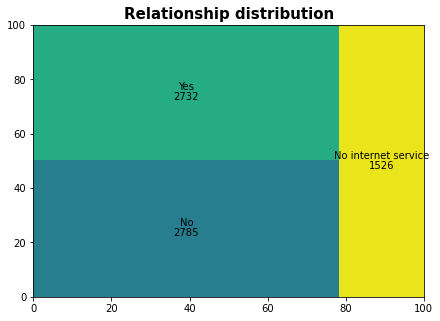

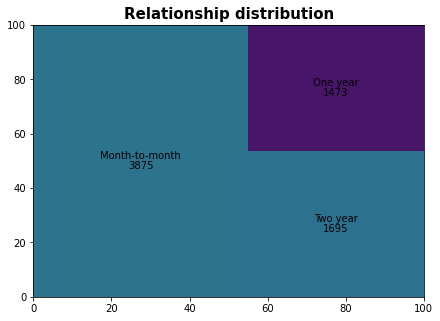

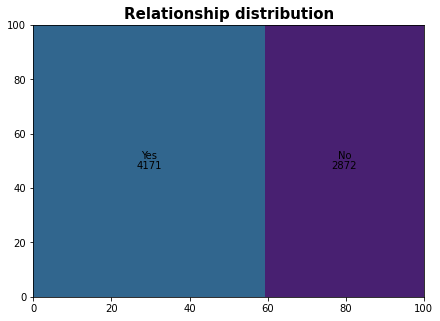

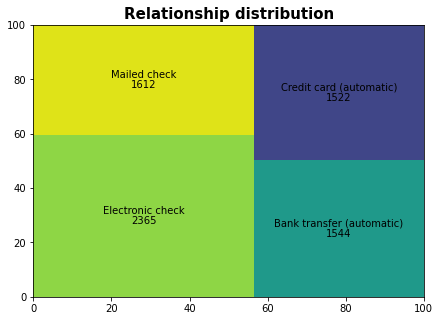

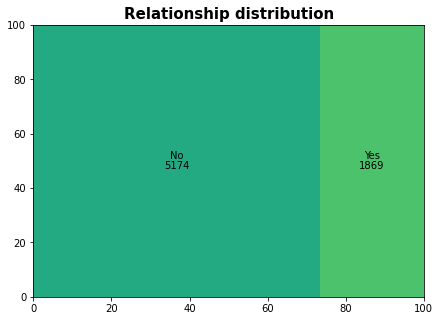

In [25]:
import squarify
for i in cat_features:
    plt.figure(figsize=(7, 5))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

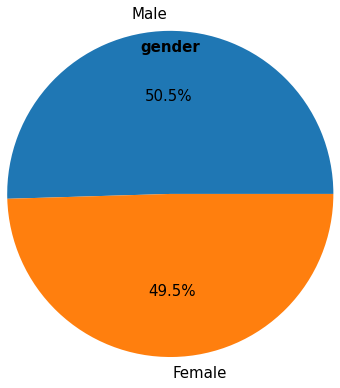

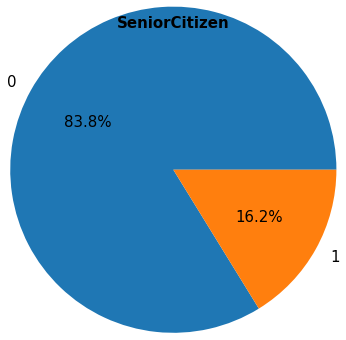

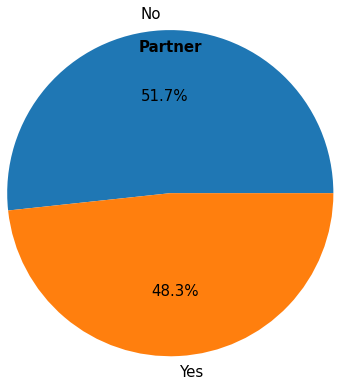

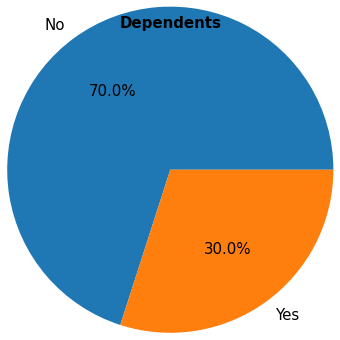

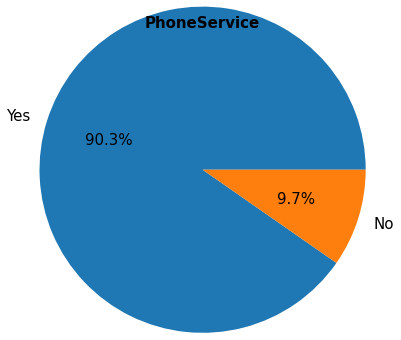

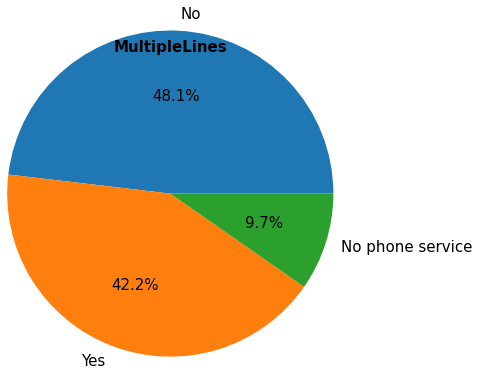

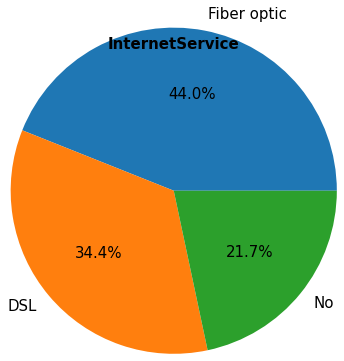

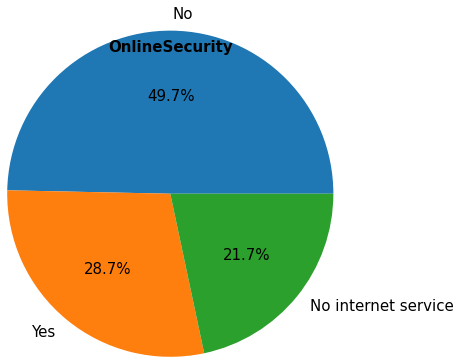

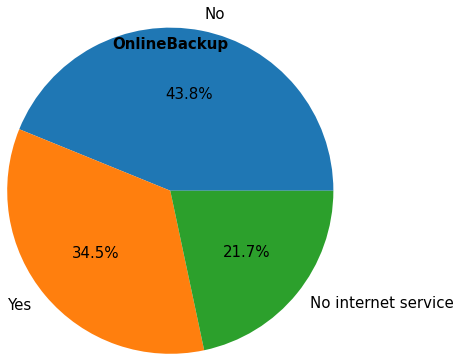

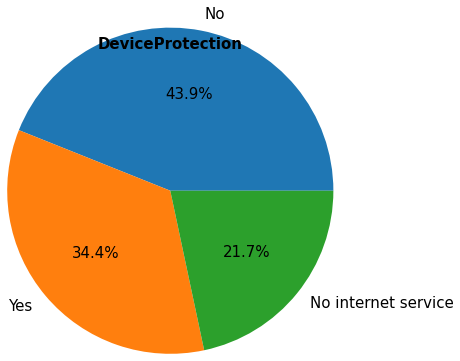

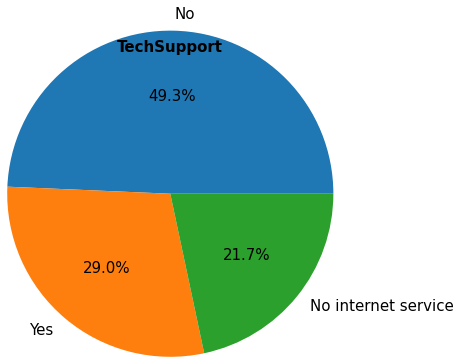

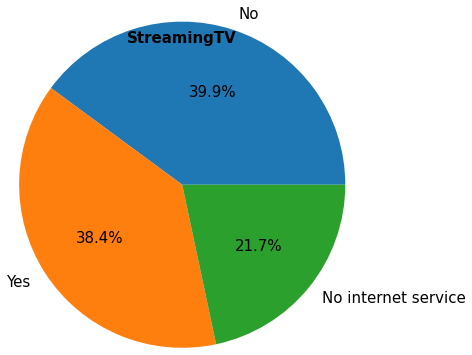

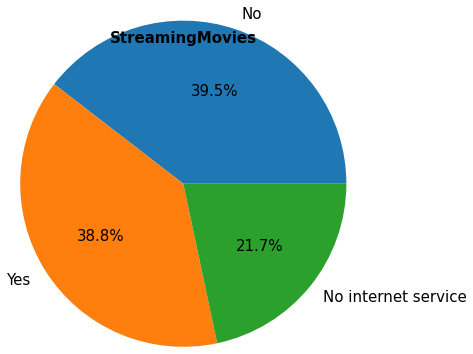

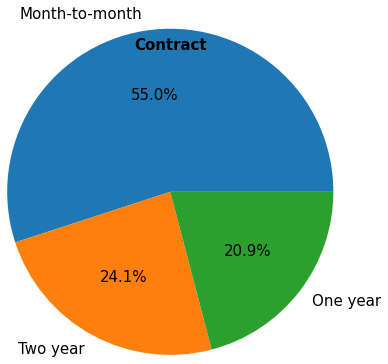

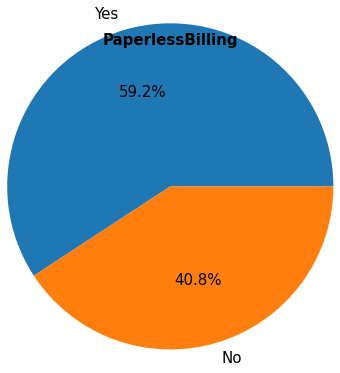

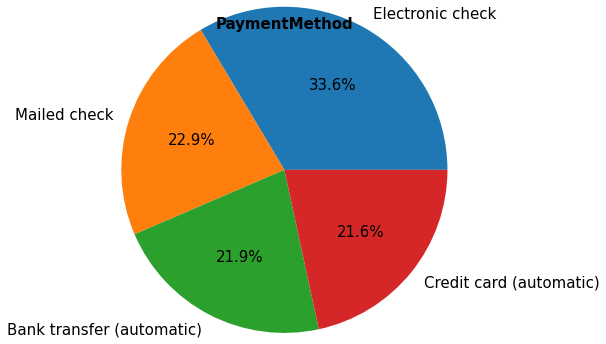

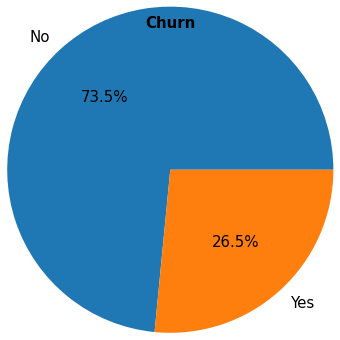

In [26]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    data[i].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

#### Observations:

1. Around 16% customer are Senior citizen
2. Around 50% customer are having partners.
3. Around 30% customer have dependents on them
4. Almost 55% customer perfer month to month contract compare to other.
5. 60% Customer perfer paperless billing.
6. Most used payment method is electronic check.
7. The distribution of target variable is quite imbalance as there is a 75:25 relationship between NO:YES of tendency of churn.

#### Analysis of Numarical variable:

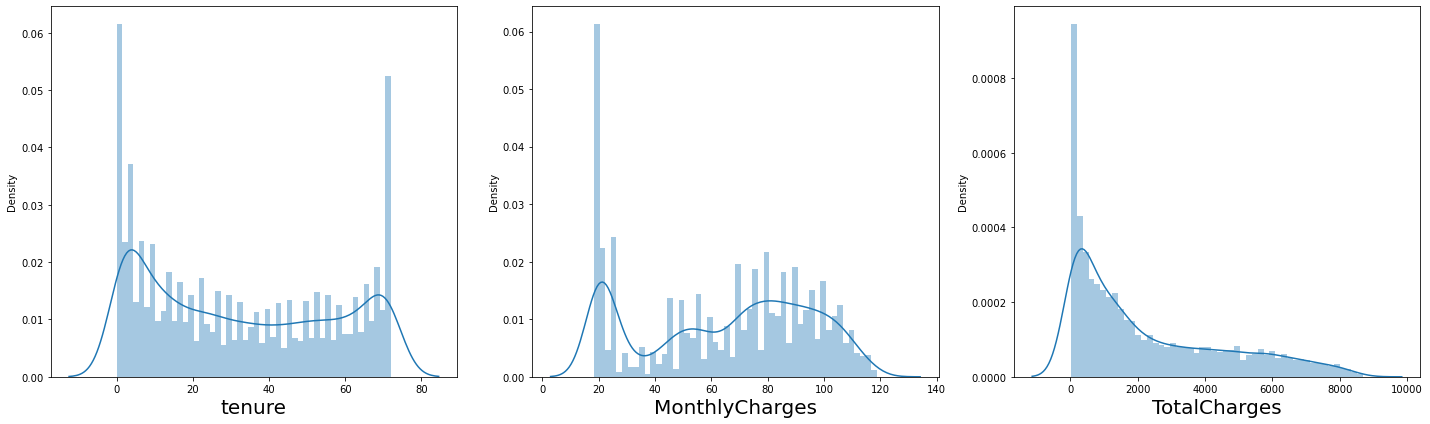

In [27]:
i=0
plt.figure(figsize=(20,6))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.distplot(data[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

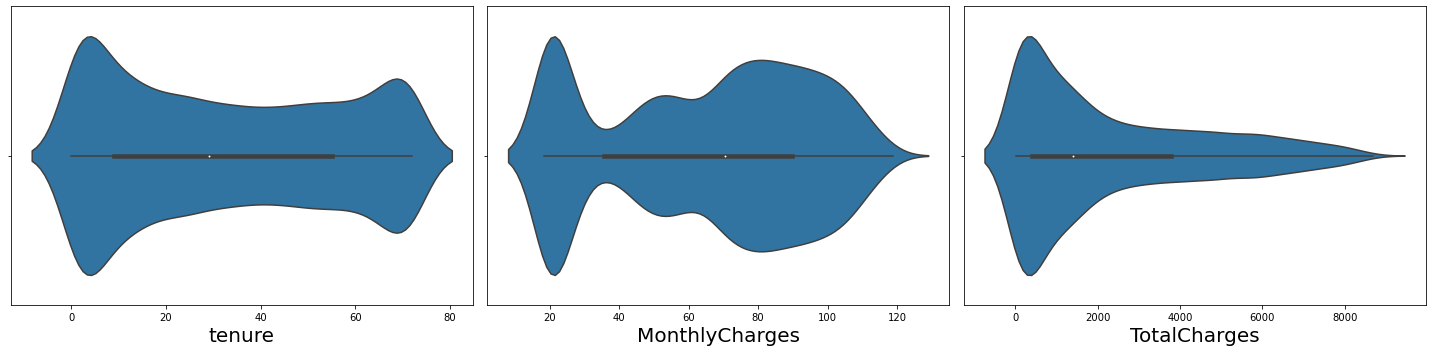

In [28]:
i=0
plt.figure(figsize=(20,5))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.violinplot(data[p])
    plt.xlabel(p,fontsize=20)
    i+=1 
plt.tight_layout()
plt.show()

#### Observations:

1. Avg range of age is 0-70.
2. Monthly charges range is 20-120.
3. 0 value is present in TotalCharges column.
4. All the data have right skewness

#### Analysis of Target variable:

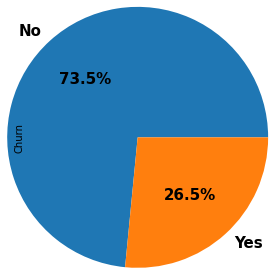

In [29]:
data['Churn'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

#### Observation :
1. 73.5 % customers are not choose to Churn the service in last month.
2. 26.5 % customers are choose to Churn the service in last month.

#### Different feature's impact on target variable:

### Bivariate Analysis:

##### 1. gender on Churn:

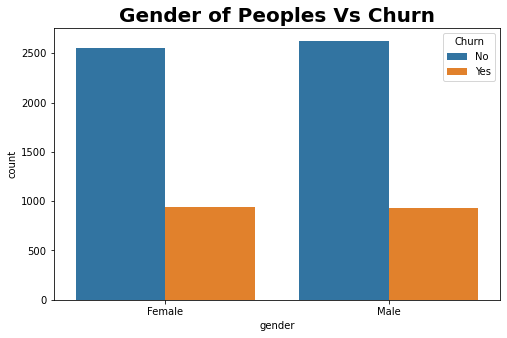

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data['gender'], hue= data['Churn'])
plt.title('Gender of Peoples Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [31]:
pd.crosstab(data['Churn'],data["gender"], margins= True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


#### Observations:
1. In terms of gender, the distribution of Churn is in same proportion with minor difference.
2. For Male, YES: NO= 26:74 and for Female, YES: NO= 27:73

#### 2. SeniorCitizen on Churn:

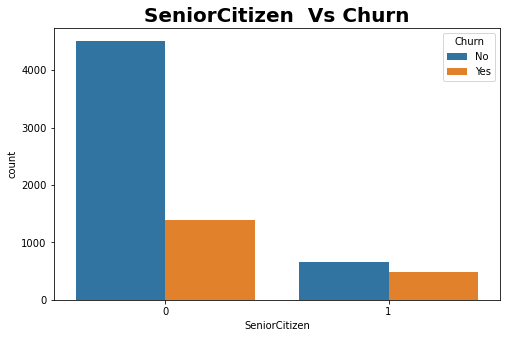

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data['SeniorCitizen'], hue= data['Churn'])
plt.title('SeniorCitizen  Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [33]:
pd.crosstab(data["SeniorCitizen"],data['Churn'], margins= True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [34]:
pd.crosstab([data.gender,data.SeniorCitizen ],data["Churn"],margins=True)

Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2221   699  2920
       1               328   240   568
Male   0              2287   694  2981
       1               338   236   574
All                   5174  1869  7043

#### Observations:

1. Senior citizen have more tendency to churn with respect to others.

#### 3. Partner Vs Churn:

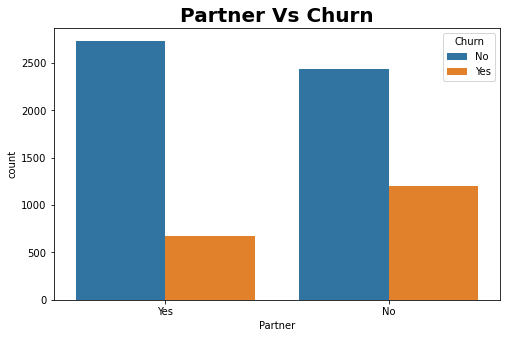

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data['Partner'], hue= data['Churn'])
plt.title('Partner Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [37]:
pd.crosstab([data.gender,data.Partner],data["Churn"],margins=True)

Churn             No   Yes   All
gender Partner                  
Female No       1180   620  1800
       Yes      1369   319  1688
Male   No       1261   580  1841
       Yes      1364   350  1714
All             5174  1869  7043

#### Observations:

1. Customer having Partner have less tendency to Churn.
2. The customer not having partner have more tendency to Churn with respect to the customer who have their partner.
 
#### 4. Dependents Vs Churn: 

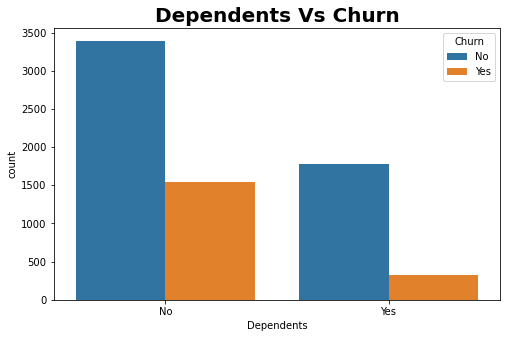

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data['Dependents'], hue= data['Churn'])
plt.title('Dependents Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [39]:
pd.crosstab([data.Dependents],data["Churn"],margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


#### Observations:

1. Only around 30% customers who have no dependents are tendency to Churn.
2. For all dependent customers around 85 % customers are more tendency to Churn.

#### 5. tenure Vs Churn:

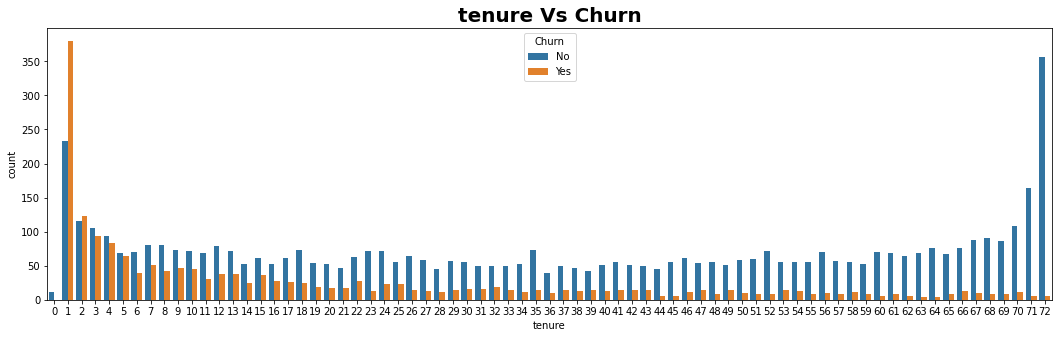

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(data['tenure'], hue= data['Churn'])
plt.title('tenure Vs Churn', fontsize=20, fontweight='bold')
plt.show()

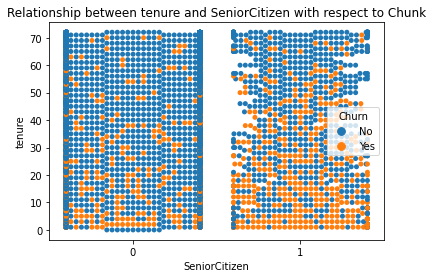

In [41]:
plt.title("Relationship between tenure and SeniorCitizen with respect to Chunk")
sns.swarmplot(x = "SeniorCitizen",y="tenure",data = data, hue= "Churn")
plt.show()

#### Observations:

1. Here for the tenure 1, the number of customer with the tendency to Churn is much greater than the number of customer who have no tendency to Churn.
2. there is no clear relationship between SeniorCitizen and tenure.


#### 6. PhoneService Vs Churn:

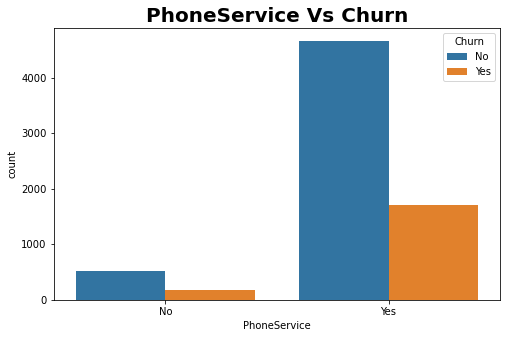

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(data['PhoneService'], hue= data['Churn'])
plt.title('PhoneService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [43]:
pd.crosstab([data.PhoneService],data["Churn"],margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


#### Observations:

1. There is no such relationship between PhoneService and churn


#### 7. MultipleLines Vs Churn:

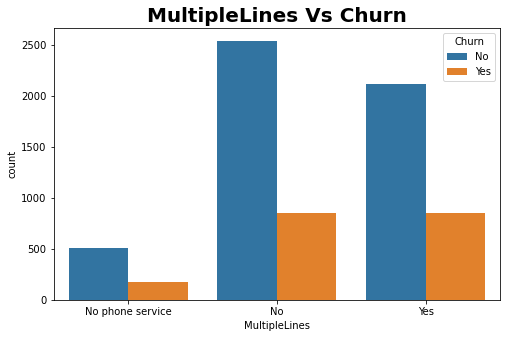

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data['MultipleLines'], hue= data['Churn'])
plt.title('MultipleLines Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [45]:
pd.crosstab([data.MultipleLines],data["Churn"],margins=True)

Churn,No,Yes,All
MultipleLines,,,
No,2541,849,3390
No phone service,512,170,682
Yes,2121,850,2971
All,5174,1869,7043


#### Observations:

1. No such relation is found from above graph.


#### 8. InternetService Vs Churn:

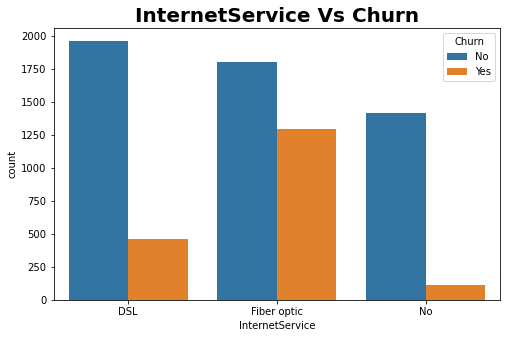

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data['InternetService'], hue= data['Churn'])
plt.title('InternetService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [47]:
pd.crosstab([data.InternetService],data["Churn"],margins=True)

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


#### Observations:

1. Mainly the positive Chunk are in the category with Fiber optic connection of internet service.
2. Out of total 3096 Fiber Optic connection, 1297 customer have tendency to Churn.

#### 9. OnlineSecurity Vs Churn:

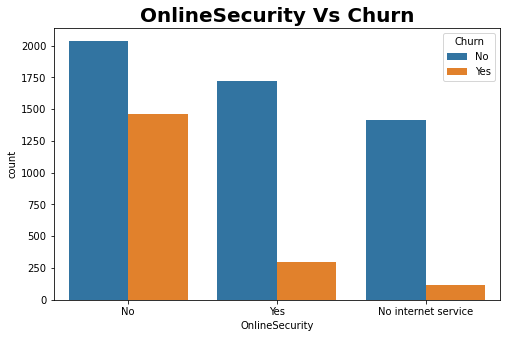

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(data['OnlineSecurity'], hue= data['Churn'])
plt.title('OnlineSecurity Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. The maximum customer who have tendency to Chunk are with No Online Security.


#### 9. OnlineBackup Vs Churn:

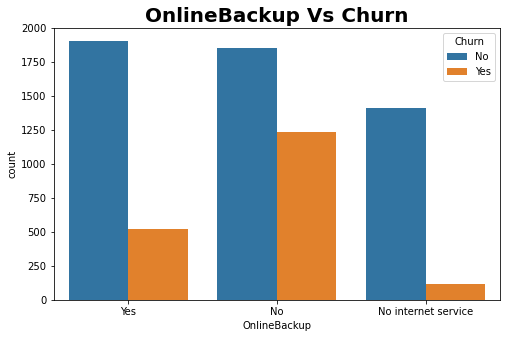

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(data['OnlineBackup'], hue= data['Churn'])
plt.title('OnlineBackup Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. The tendency of chuck increased if the customer have no Online Backup. It is quite Obvious!!


#### 9. DeviceProtection Vs Churn:

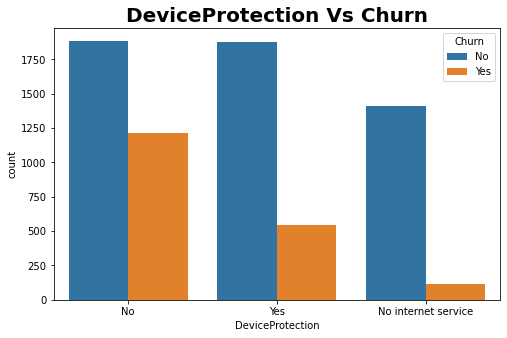

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data['DeviceProtection'], hue= data['Churn'])
plt.title('DeviceProtection Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. The customer with no device protection is more tendence to Chunk.


#### 9. TechSupport Vs Churn:

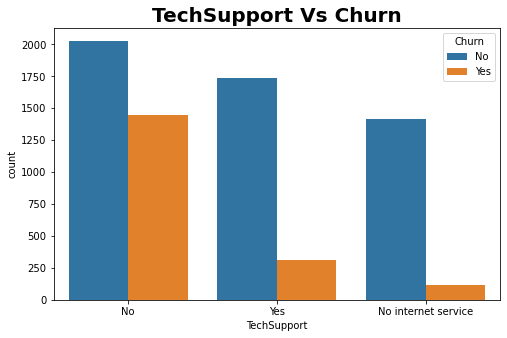

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data['TechSupport'], hue= data['Churn'])
plt.title('TechSupport Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. The customer with no tech support(just like device protection) is more tendence to Chunk.


#### 10. StreamingTV Vs Churn:

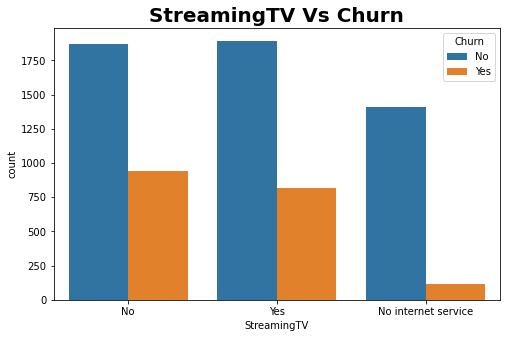

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(data['StreamingTV'], hue= data['Churn'])
plt.title('StreamingTV Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. Churn tendency in people who streamingTV or not are same.


#### 11. StreamingMovies Vs Churn:

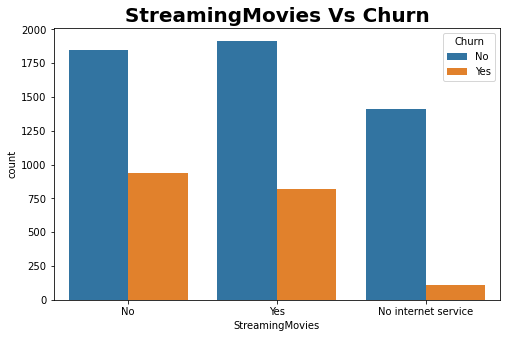

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(data['StreamingMovies'], hue= data['Churn'])
plt.title('StreamingMovies Vs Churn', fontsize=20, fontweight='bold')
plt.show()

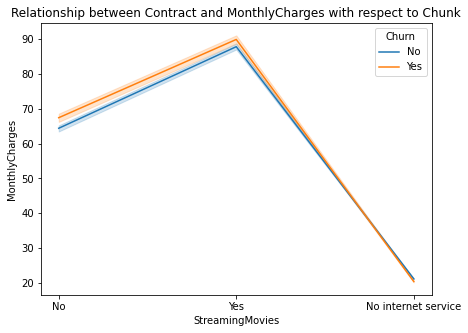

In [54]:
plt.figure(figsize=(7,5))
sns.lineplot(x="StreamingMovies", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

#### Observations:

1. Almost same churn tendency in people streaming Movies and not.


#### 12. Contract Vs Churn:

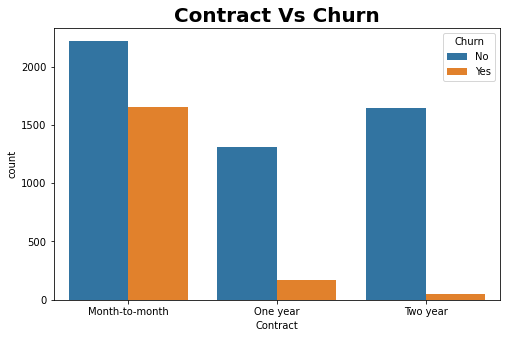

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(data['Contract'], hue= data['Churn'])
plt.title('Contract Vs Churn', fontsize=20, fontweight='bold')
plt.show()

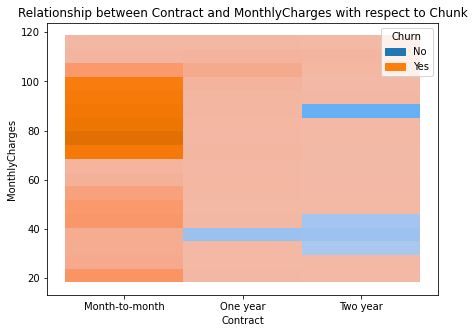

In [56]:
plt.figure(figsize=(7,5))
sns.histplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

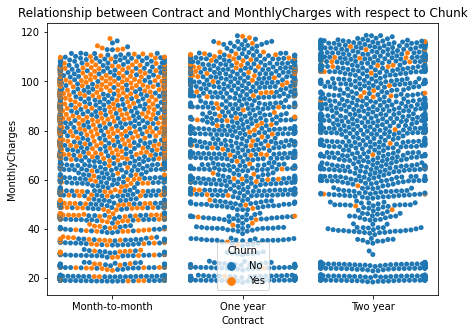

In [57]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

#### Observations:

1. If the contract type is month to month, there is a high churn rate in the customer.

2. No relation is found between MonthlyCharges and Contract.


#### 13. PaperlessBilling Vs Churn:

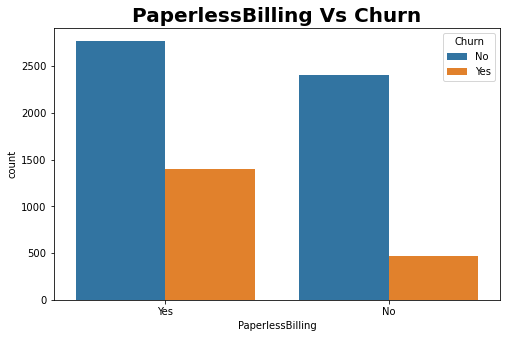

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(data['PaperlessBilling'], hue= data['Churn'])
plt.title('PaperlessBilling Vs Churn', fontsize=20, fontweight='bold')
plt.show()

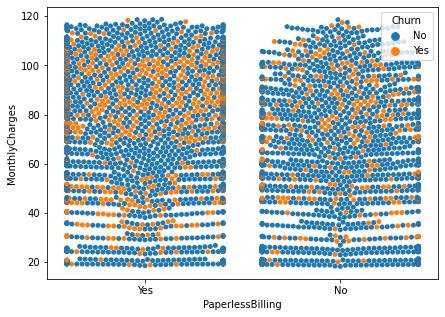

In [59]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="PaperlessBilling", y='MonthlyCharges',data=data,hue="Churn")
plt.show()

#### Observations:

1. The customers who prefer paperless billing they have high rate to churn.
2. No relation is found between MonthlyCharges and PaperlessBilling.

#### 14. PaymentMethod Vs Churn:

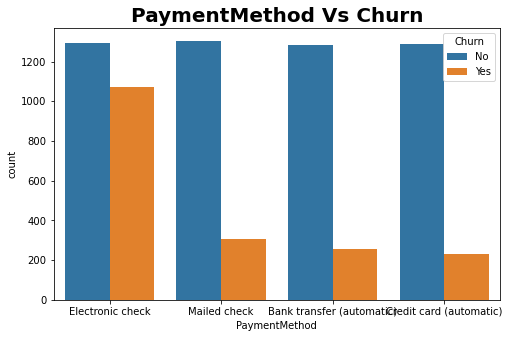

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(data['PaymentMethod'], hue= data['Churn'])
plt.title('PaymentMethod Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. There is a high churn tendency in customer whoes payment method is Electronic check.

#### 15. MonthlyCharges Vs Churn:

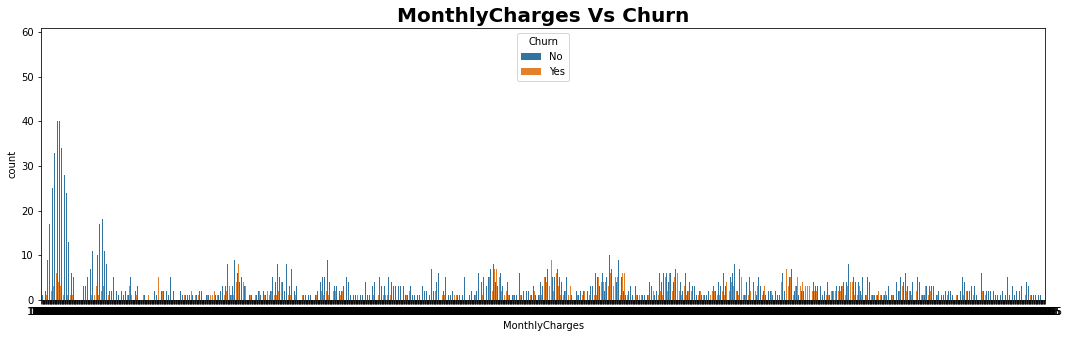

In [61]:
plt.figure(figsize=(18,5))
sns.countplot(data['MonthlyCharges'], hue= data['Churn'])
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### 16. TotalCharges Vs Churn:

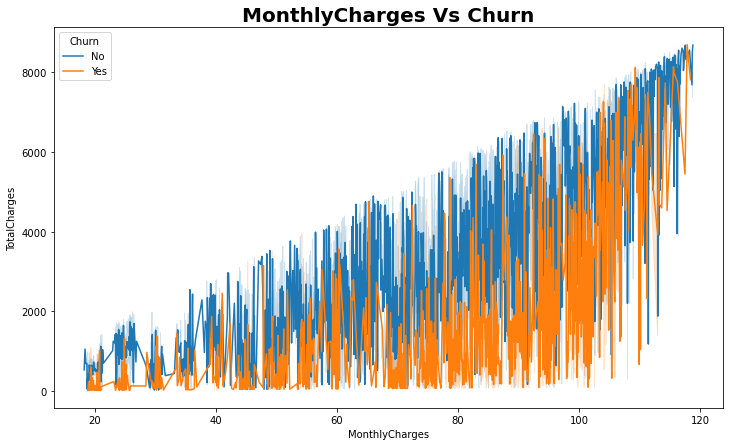

In [62]:
plt.figure(figsize=(12,7))
sns.lineplot(y="TotalCharges", x='MonthlyCharges',data=data,hue="Churn")
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

#### Observations:

1. If MonthlyCharges is high, then the customers are more tendence to choose churn compare to rest.
2. Also if TotalCharges is high, then the customers are more tendence to choose churn compare to rest.

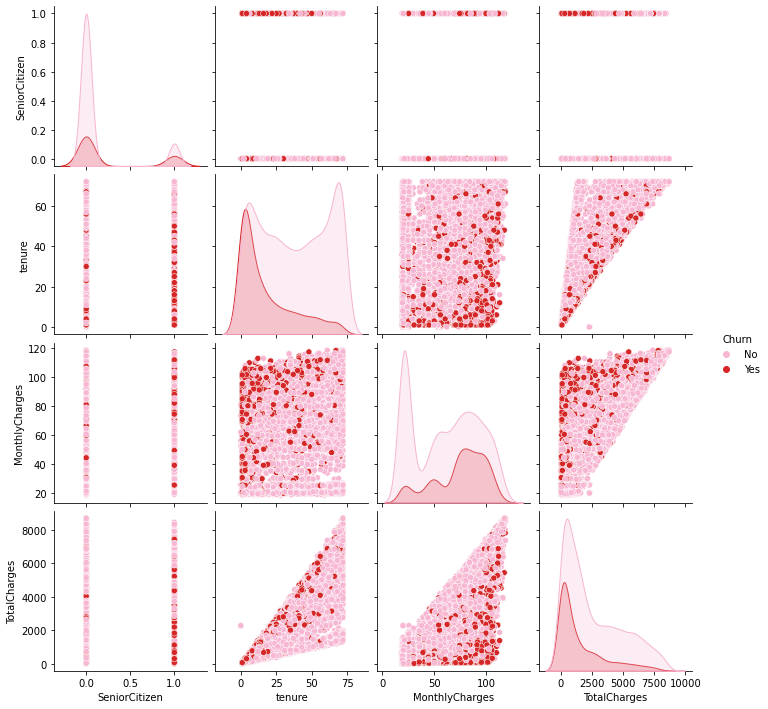

In [63]:
sns.pairplot(data,hue="Churn",palette="tab20_r")
plt.show()

#### Observation:

1. Nothing special relationship are found from the above pairplot.

### Correlation:

In [64]:
data.corr().T

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


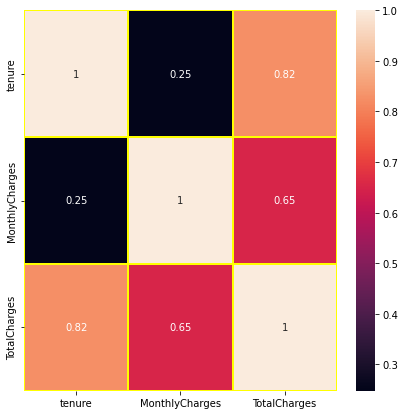

In [65]:
plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

#### observations:

Correlation is high between total charges and tanure. But as we have only 3 numarical features at this time, let's encode the categorical features.

### Encoding for categorical features:

#### Using label encoder:

In [66]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation after encoding:

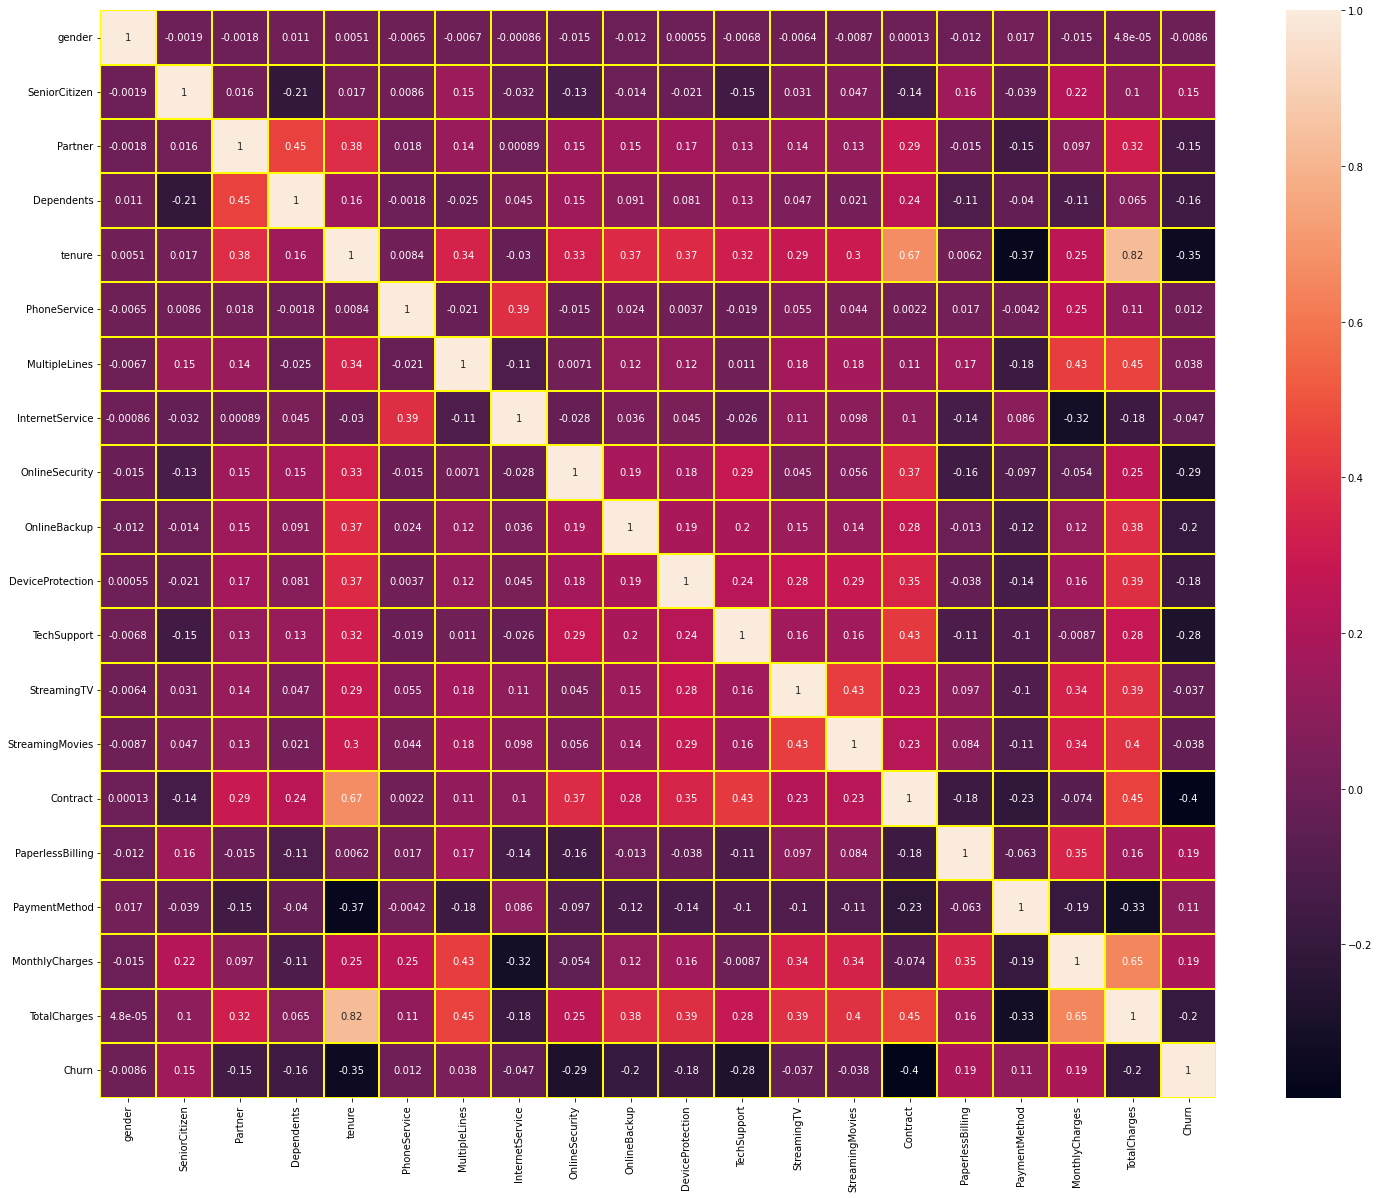

In [68]:
plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

#### Correlation of Other features with SalePrice(target variable):

<AxesSubplot:title={'center':'feature vs Churn corr'}>

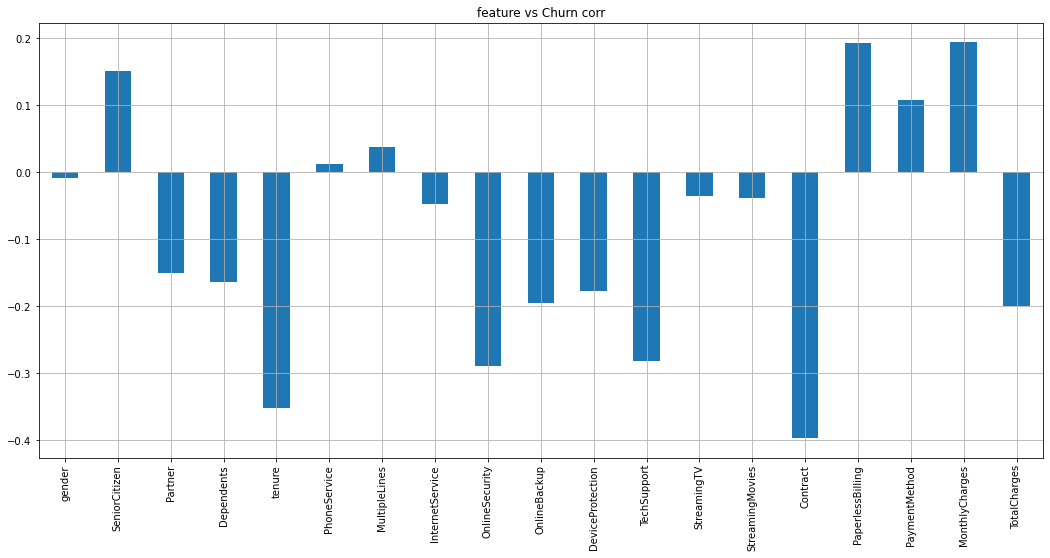

In [69]:
data.drop("Churn",axis=1).corrwith(data["Churn"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Churn corr')

#### Observations:

1. Churn has a highly negetive relationship with Contract.
2. In other hand, paperless billing and monthly charges are positively correlated with churn.
3. All the features are correlated with each other

### Outlier Detection of training data::

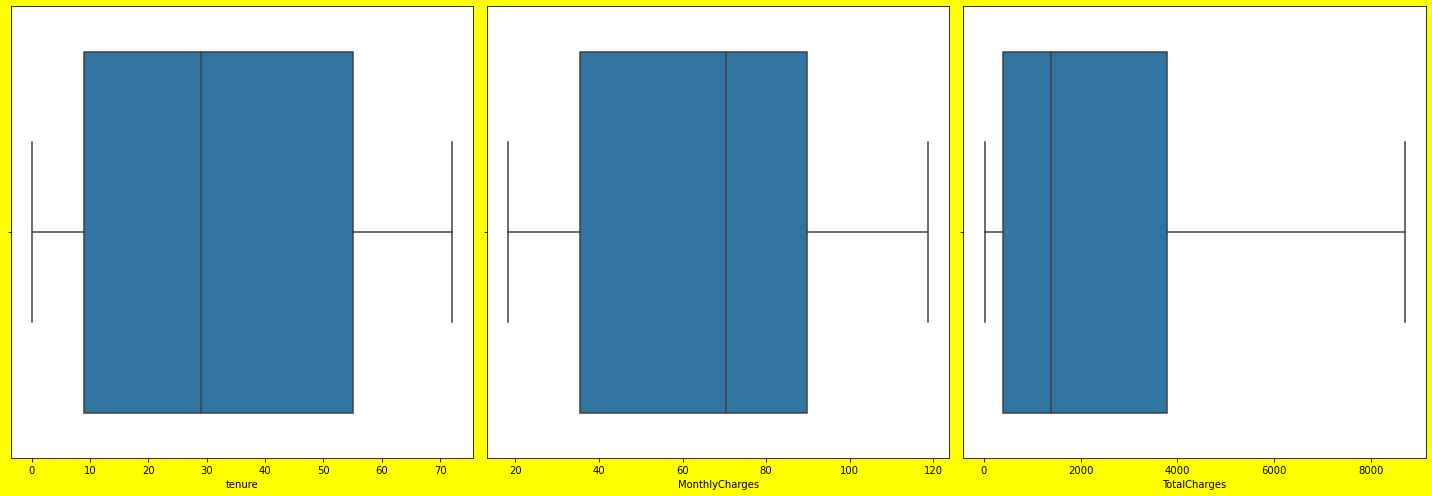

In [70]:
plt.figure(figsize=(20,7),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=3:
        ax=plt.subplot(1,3,pltno)
        sns.boxplot(data[x])
    pltno+=1
plt.tight_layout()
plt.show()

In [71]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

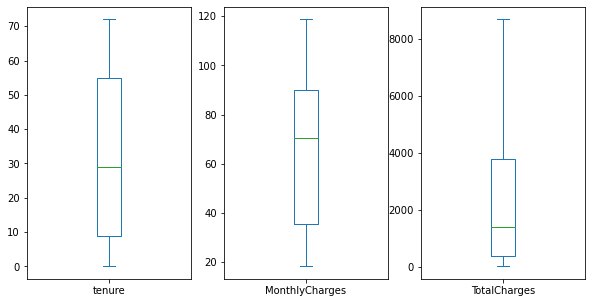

In [72]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind ='box', subplots =True , layout =(1,3), figsize = (10,5))
plt.show()

#### Observtations:

1. No such outliers are present in the dataset.

### Skewness:

In [73]:
data.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

In [74]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
dtype: float64

#### Observations:
1. Except 3 features, all are categorical data. So let's ignore those skewness.
2. Here numarical variable is 'tenure', 'MonthlyCharges', 'TotalCharges' and out of which TotalCharges have some skewness. Let's remove the skewness.

In [75]:
data1= data.copy()

In [76]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [77]:
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']].values)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1


In [78]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges     -0.144899
tenure            0.239540
dtype: float64

### Balancing Imbalanced target feature(Churn) using SMOTE:

In [79]:
from imblearn.over_sampling import SMOTE
ovrs = SMOTE()

# Splitting data in target and features
x = data.drop(['Churn'], axis =1)
y = data['Churn']

In [80]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [81]:
x,y = ovrs.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Checking Multicollinearity:

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
vif["Features"] = data.columns
vif

,VIF,Features
0,1.992203,gender
1,1.372640,SeniorCitizen
2,2.821218,Partner
3,1.961200,Dependents
4,13.497891,tenure
5,16.014903,PhoneService
6,2.756853,MultipleLines
7,4.478147,InternetService
8,2.287594,OnlineSecurity
9,2.445350,OnlineBackup


#### Observation:

1. Multicollinearity present between different features.

Remove this after checking PCA. 

### Principal Component Analysis (PCA) :

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

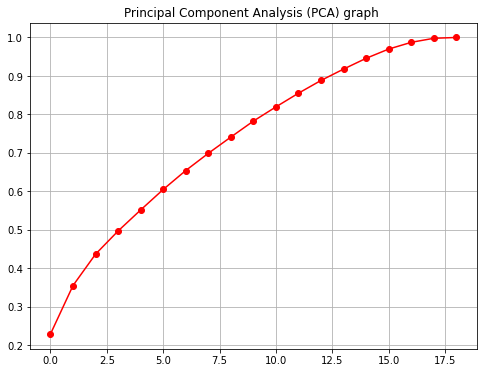

In [84]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

#### Observations:

Here , around 95% variance gives the first 14 component. Let's take the first 14 components.

In [85]:
pca_new = PCA(n_components=14)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.375372,0.785135,2.812376,-0.074058,0.644245,-0.802967,1.237569,0.795269,-0.498561,-2.456043,-0.241319,0.084540,-0.060590,0.215512
1,-0.512467,1.609310,0.624002,0.766939,0.258444,1.265990,-1.036844,0.344414,-0.613363,2.055956,0.469875,1.521016,-1.515319,-1.183670
2,-2.224903,0.914507,0.624758,-0.058993,0.258850,1.411274,-1.455157,2.246946,-0.556173,-0.518935,0.489933,-0.380517,-1.572485,0.176388
3,0.753804,2.345149,3.221791,2.252224,0.243109,1.101460,-0.607125,-1.457789,0.709937,0.869107,-0.554736,0.782717,-0.137900,0.960673
4,-2.948582,-0.440182,-0.232074,-0.223993,-0.828436,-0.471279,-0.332782,0.592521,0.686641,-0.119688,-0.246779,0.285502,0.058696,-0.580078


### Final predictions using different Classification ML Models for Income:

#### Find best Random state:

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(400, 1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8032470042520293 on Random_state 1261


**Here the best accuracy on Random_state=1261,  Let's take it.**

In [90]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7761, 14)
Training target shape: (7761,)
Test feature shape: (2587, 14)
Test target shape: (2587,)


### Using LogisticRegression():

In [91]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=1261)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.8032470042520293
cof_mat:
  [[ 979  313]
 [ 196 1099]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.76      0.79      1292
           1       0.78      0.85      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587

-----------
-----------
training score :  0.7776059786110038
testing score :  0.8032470042520293


#### Use GridSearchCV for hyperparameter tuning:

In [92]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [93]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8028604561267878
cof_mat:

  [[ 977  315]
 [ 195 1100]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.76      0.79      1292
           1       0.78      0.85      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587

-----------
-----------
training score :  0.7787656229867285
testing score :  0.8028604561267878


#### Observations:

R2 score not improved after using gridsearchCV .

### Using DecisionTreeClassifier()

In [94]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.768457672980286


cof_mat:  [[ 955  337]
 [ 262 1033]]


classification report: 

               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1292
           1       0.75      0.80      0.78      1295

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.768457672980286


#### Use GridSearchCV for hyperparameter tuning:

In [95]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


In [102]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.793196752995748


cof_mat:  [[ 973  319]
 [ 216 1079]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1292
           1       0.77      0.83      0.80      1295

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587

-----------
-----------
training score :  0.8054374436283984
testing score :  0.793196752995748


#### Observations:
Accuracy score is slightly improved after using GridSearchCV with DecisionTreeClassifier(). 

The difference between training score, testing score is also decreased.  

### Using GradientBoostingClassifier():

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.818708929261693


cof_mat:  [[1002  290]
 [ 179 1116]]


classification report: 

               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1292
           1       0.79      0.86      0.83      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.8229609586393506
testing score :  0.818708929261693


#### Using Gridsearch CV:

In [104]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [107]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8190954773869347


cof_mat:  [[1003  289]
 [ 179 1116]]


classification report:

                precision    recall  f1-score   support

           0       0.85      0.78      0.81      1292
           1       0.79      0.86      0.83      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.8229609586393506
testing score :  0.8190954773869347


### Observations:
Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

### Using RandomForestClassifier()

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))


accu score :  0.8272129880170082


cof_mat:  [[1063  229]
 [ 218 1077]]


classification report:                precision    recall  f1-score   support

           0       0.83      0.82      0.83      1292
           1       0.82      0.83      0.83      1295

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8272129880170082


#### Use GridSearchCV for hyperparameter tuning:

In [109]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}


In [111]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.8322381136451488


cof_mat:  [[1050  242]
 [ 192 1103]]


classification report: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1292
           1       0.82      0.85      0.84      1295

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

-----------
-----------
training score :  0.9882747068676717
testing score :  0.8322381136451488


#### Observations:
Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier() 

### ExtraTreesClassifier():

In [112]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8275995361422497


cof_mat:  [[1068  224]
 [ 222 1073]]


classification report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83      1292
           1       0.83      0.83      0.83      1295

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8275995361422497


#### Use GridSearchCV for hyperparameter tuning:

In [113]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 150}


In [116]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8299188248936993


cof_mat:  [[1046  246]
 [ 194 1101]]


classification report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1292
           1       0.82      0.85      0.83      1295

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

-----------
-----------
training score :  0.9713954387321222
testing score :  0.8299188248936993


#### Observations:
Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

### Using AdaBoostClassifier:

In [117]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.8063393892539621


cof_mat:  [[ 996  296]
 [ 205 1090]]


classification report:                precision    recall  f1-score   support

           0       0.83      0.77      0.80      1292
           1       0.79      0.84      0.81      1295

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

-----------
-----------
training score :  0.7946140961216338
testing score :  0.8063393892539621


#### Using GridSearchCV for hyperparameter tuning:

In [118]:
params = {'n_estimators' : [50,40, 60], 'learning_rate': [1,0.1,0.01] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 50}


In [120]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.8063393892539621


cof_mat:  [[ 996  296]
 [ 205 1090]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1292
           1       0.79      0.84      0.81      1295

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

-----------
-----------
training score :  0.7946140961216338
testing score :  0.8063393892539621


#### Observations:

Accuracy score is not improved after using GridSearchCV with AdaBoostClassifier().

### Using SVC('rbf'):

In [121]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [122]:
svmkernel('rbf')

accu score :  0.820641669887901


cof_mat:  [[ 994  298]
 [ 166 1129]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1292
           1       0.79      0.87      0.83      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.8032470042520293
testing score :  0.820641669887901


#### Using SVC ('linear'):

In [123]:
svmkernel('linear')

accu score :  0.7970622342481639


cof_mat:  [[ 971  321]
 [ 204 1091]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1292
           1       0.77      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7736116479835072
testing score :  0.7970622342481639


#### Using SVC ('poly'):

In [124]:
svmkernel('poly')

accu score :  0.7873985311171241


cof_mat:  [[ 884  408]
 [ 142 1153]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.68      0.76      1292
           1       0.74      0.89      0.81      1295

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587

-----------
-----------
training score :  0.767942275479964
testing score :  0.7873985311171241


**RandomforestClassifier() gives best accuracy.**

### Cross Validtion:

In [125]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.7525355  0.7464503  0.77063599 0.80311231 0.81867388 0.82138024
 0.8173207 ]

Mean CV Score : 0.7900155629420821

Std deviation : 0.03023808599222944

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='log_loss',
                       max_features='sqrt')

 Cross Validation Score :  [0.71602434 0.74171738 0.77401894 0.80243572 0.79296346 0.81258457
 0.83491204]

Mean CV Score : 0.7820937810054728

Std deviation : 0.03838159878639695

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.7525355  0.7484787  0.79837618 0.83355886 0.85588633 0.85317997
 0.8511502 ]

Mean CV Score : 0.8133093935628471

Std deviation : 0.043693596443115025

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

 Cross Validation Score :  [0.77484787 0.7741717

#### Observations:

#### Among 7 classification models  RandomforestClassifier() gives good accuracy and maximum f1 score along with a good  Cross-validation score. 

## Let's plot AUC-ROC Curve.

Plotting ROC AUC Curve to choose best model

In [126]:
log.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [127]:
log.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


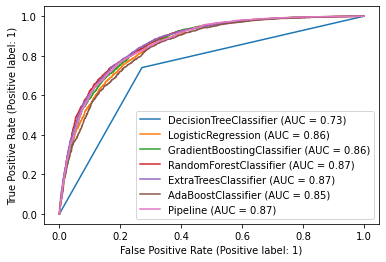

In [128]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

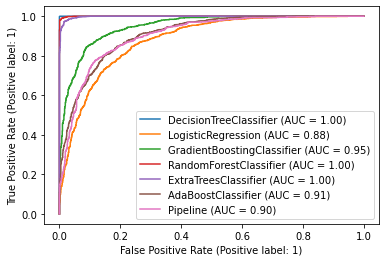

In [129]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

#### Observations:

Here Randomforest gives best AUC score. **So it is the final model for  this dataset.**

In [131]:
grid_rf_best.fit(x_train, y_train)
y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.8248936992655586


cof_mat:  [[1050  242]
 [ 211 1084]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.82      0.84      0.83      1295

    accuracy                           0.82      2587
   macro avg       0.83      0.82      0.82      2587
weighted avg       0.83      0.82      0.82      2587

-----------
-----------
training score :  0.9860842674913026
testing score :  0.8248936992655586


### confusion matrix

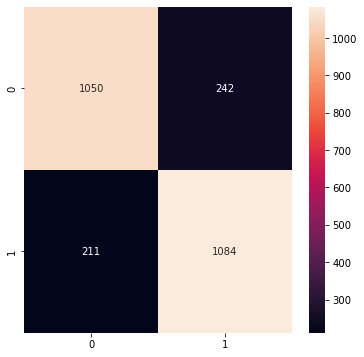

In [132]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

In [133]:
import pickle
pickle.dump(grid_etc_best, open("Customer_Churn_Classification_model", "wb"))
load_Customer_Churn_Classification_model= pickle.load(open("Customer_Churn_Classification_model", "rb"))

In [134]:
y_pred = load_Customer_Churn_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
2267,0,0
1639,0,0
74,1,1
437,1,1
306,0,0
2560,1,1


### Feature importance:

In [135]:
feature= x.columns

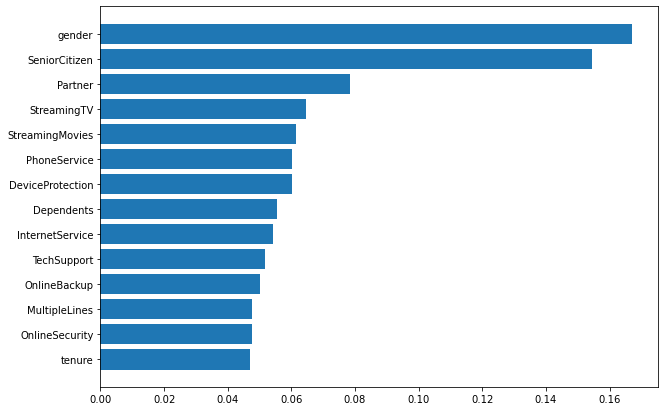

In [136]:
fimp = list(zip(feature,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

**Gender is the most importance feature amomg all for this dataset.**